In [78]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving flowers.csv to flowers (1).csv
User uploaded file "flowers (1).csv" with length 2762 bytes


# **Une étude sur une variété de fleurs**

# Objectifs : Créer un modèle permettant de détecter le type de fleur parmi la variété

# Importation des librairies et aperçu du dataframe

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('flowers.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   flower_type   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Le dataframe est très simple, que des variables numériques de même type

In [81]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [82]:
df['flower_type'].value_counts()

1    50
2    50
0    50
Name: flower_type, dtype: int64

# La variable cible est ici flower_type avec trois modalités

In [83]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
flower_type     0
dtype: int64

# Il n y a pas de valeurs manquantes

#  Pas de valeurs manquantes, dataset clean

In [84]:
df.duplicated().sum()

3

# On a trois doublons dans le dataset

# Suppression des doublons

In [85]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [86]:
df.duplicated().sum()

0

In [87]:
from sklearn.model_selection import train_test_split

features = df.drop(['flower_type'], axis = 1)

target = df['flower_type']

X_train, X_test, y_train, y_test = train_test_split (features, target, test_size = 0.2)

# Trois modèles de classifications

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier()
clf_3 = RandomForestClassifier()

# Entraînement des trois modèles

In [89]:
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
print('Score sur ensemble train avec regression logistique', clf_1.score(X_train, y_train))
print('Score sur ensemble test avec regression logistique', clf_1.score(X_test, y_test))

print('Score sur ensemble train avec Decision tree', clf_2.score(X_train, y_train))
print('Score sur ensemble test avec Decision tree', clf_2.score(X_test, y_test))

print('Score sur ensemble train avec random forest', clf_3.score(X_train, y_train))
print('Score sur ensemble test avec random forest', clf_3.score(X_test, y_test))

Score sur ensemble train avec regression logistique 0.9658119658119658
Score sur ensemble test avec regression logistique 0.9666666666666667
Score sur ensemble train avec Decision tree 1.0
Score sur ensemble test avec Decision tree 0.9333333333333333
Score sur ensemble train avec random forest 1.0
Score sur ensemble test avec random forest 0.9666666666666667


# On a de l'overfitting avec l'arbre de décision et le random forest. Autrement dit, ces modèles ont trop appris avec le jeu de donnée donc ils ne seront pas performants. On poursuivra avec la régression logistique.

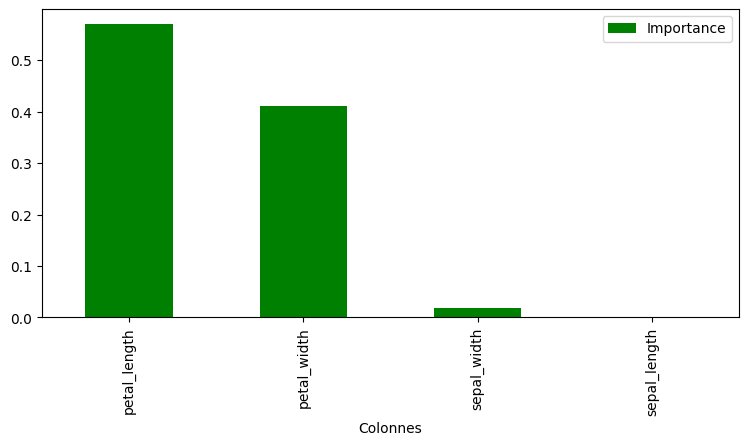

In [91]:
colonnes_importantes = pd.DataFrame({
    "Colonnes":
    features.columns,
    "Importance":
    clf_2.feature_importances_
}).sort_values(by='Importance', ascending=False)


colonnes_importantes.nlargest(5, "Importance").plot.bar(x="Colonnes",
                                                    y="Importance",
                                                    figsize=(9, 4),
                                                    color="green");

# On constate que les deux variables, petal_length et petal_width, sont les plus importantes.

In [92]:
y_pred_linear_regression = clf_2.predict(X_test)

In [93]:
print("Les prédictions d'après la Régression Linéaire: \n", y_pred_linear_regression)

Les prédictions d'après la Régression Linéaire: 
 [2 1 0 2 2 2 2 2 0 0 1 0 2 2 1 1 1 2 0 0 1 0 0 2 0 2 0 0 2 1]


# Les prédictions par rapport à la régression logistic.

In [94]:
fleur_by_ALIEN = df.to_csv('fleur_by_ALIEN.csv')